<h2> Author- Ashwin Radhakrishnan</h2>
<h2><b><u> The sparks foundation</u>&nbsp; <u>IOT and Computer vision</u>;</b></h2>

<h2><b><i><u>Task4</u> : Detection of Face mask</i></b></h2>
<hr>


<h1><b>import libraries</b></h1>

In [5]:
import cv2,os
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np


<h1>data preperation</h1>


In [9]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

print(f'Categories : {categories}')
print(f'Labels     : {labels}')
print(f'label_dict : {label_dict}')

img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
target=np_utils.to_categorical(target)      

print(f'target shape : {target.shape}')
print(f'data shape   : {data.shape}')

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

Categories : ['with mask', 'without mask']
Labels     : [0, 1]
label_dict : {'with mask': 0, 'without mask': 1}
target shape : (1376, 2)
data shape   : (1376, 100, 100, 1)


<h1>model construction: using keras</h1> 

In [7]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 100)       1000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 100)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       90100     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=1,save_best_only=True,mode='min')
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2,callbacks = checkpoint,verbose=1)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7209 - accuracy: 0.5040
Epoch 00001: val_loss improved from inf to 0.66158, saving model to model-001.model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
31/31 [==============================] - 41s 1s/step - loss: 0.7209 - accuracy: 0.5040 - val_loss: 0.6616 - val_accuracy: 0.5685
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5326 - accuracy: 0.7313
Epoch 00002: val_loss improved from 0.66158 to 0.46691, saving model to model-002.model
INFO:tensorflow:Assets written to: model-002.model\assets
31/31 [==============================] - 38s 1s/step - loss: 0.5326 - accuracy: 0.7313 - val_loss: 0.4669 - val_accuracy: 0.8024
Epoch 3/20
31/31 [==============

<br><h3> Upon analysis of the training process we know that the results did not improve beyond that of epoch 10. 
<hr>

<h3> The training process is visualized below. Insights from these graphs will tell us if training was done properly or not</h3><br>

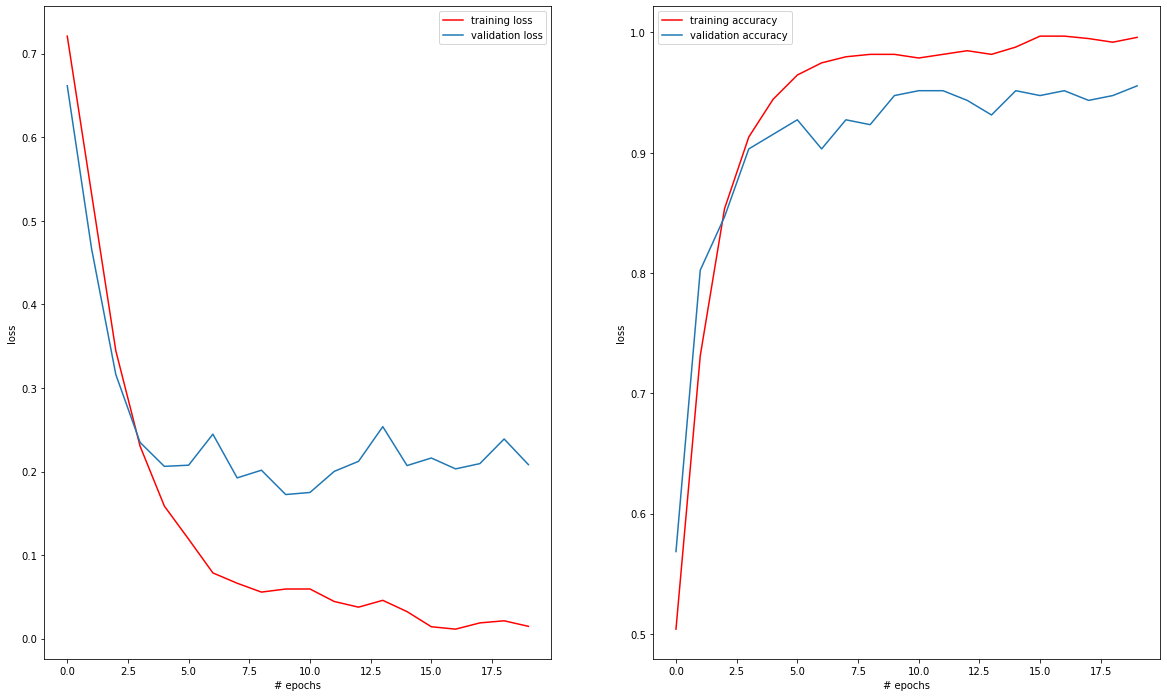

In [10]:
plt.figure(figsize = (20,12))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

<h1>Ready. set.. DETECT! &nbsp;&#129313; </h1>

In [11]:
model = load_model('model-010.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

source=cv2.VideoCapture(0)
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

<h1> Thank you </h1>